In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_excel('train.xlsx')
raw_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,train_2996,0,12.7906,-6.6952,8.9214,8.7456,9.7838,-13.3113,5.9395,17.1793,...,12.4624,8.6757,1.8539,1.8595,20.0964,-1.8607,3.6957,7.1619,10.8426,-12.2040
2997,train_2997,0,7.8752,-6.6599,10.2925,8.3582,12.8487,-13.6883,4.5218,13.4695,...,2.8302,6.0452,2.3434,0.8373,18.2609,0.3159,-1.5047,8.3811,21.1464,0.5044
2998,train_2998,0,12.4543,0.5636,7.6201,6.5594,11.9902,-1.0181,5.9425,18.9612,...,8.5948,9.8214,3.3406,4.6509,14.6915,-2.3242,-4.4507,9.7024,19.4117,14.7711
2999,train_2999,0,8.3127,6.3142,8.4590,9.7534,11.9035,5.0464,5.6587,21.5793,...,-3.1613,8.2801,0.4287,2.7820,18.7185,-1.3488,8.9783,8.3284,15.5289,-7.8532


# Missing Value Analysis

In [3]:
raw_data.isna().sum().sum()

0

There are no Missing values.

In [4]:
# Convert Columns to their respective type
raw_data['ID_code'] = raw_data['ID_code'].astype('object')
raw_data['target'] = raw_data['target'].astype('category')
raw_data.iloc[:, 2:] = raw_data.iloc[:, 2:].astype('float')

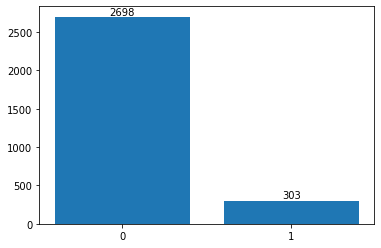

In [5]:
# Plot Bar graph on Target variable
fig, ax = plt.subplots()
bar_plot = plt.bar(raw_data['target'].value_counts().index, raw_data['target'].value_counts().values, tick_label=raw_data['target'].value_counts().index)
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height, height, ha='center', va='bottom', rotation=0)
autolabel(bar_plot)
plt.show()

Since the data is unbalanced. We have to resample the data.

# Resampling

In [6]:
from sklearn.utils import resample

data_majority = raw_data[raw_data['target'] == 0]
data_minority = raw_data[raw_data['target'] == 1]

In [7]:
# We Upsample the data
data_majority_downsampled = resample(data_majority,
                                  replace = True,
                                  n_samples = data_minority.shape[0],
                                  random_state = 45)

In [8]:
raw_data = pd.concat([data_majority_downsampled, data_minority], axis=0)
raw_data.shape

(606, 202)

# Feature Selection

#### Using Correlation Matrix

In [9]:
correlation_matrix = pd.DataFrame(raw_data.corr())

In [10]:
# plt.figure(figsize = (20,15))
# sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='w', annot=True)
# plt.show()

In [11]:
# Display pair of columns having correlation greater than 0.70

row = list(correlation_matrix.index)
col = list(correlation_matrix.columns)
corr_mark = 0.75
atleastOne = 0
l = []
for r in row:
    for c in col:
        if r != c:
            if [c, r] not in l:
                if correlation_matrix[r][c] > corr_mark:
                    atleastOne = 1
                    l.append([r, c])
                    print(r, ' - ', c, '  --> ', correlation_matrix[r][c])
                else:
                    continue
            else:
                continue
        else:
            continue
if atleastOne == 0:
    print('NONE of the columns have Correlation greater than', corr_mark)

NONE of the columns have Correlation greater than 0.75


# Outlier Analysis

In [12]:
columns = list(raw_data.columns)
num_cols = raw_data._get_numeric_data().columns

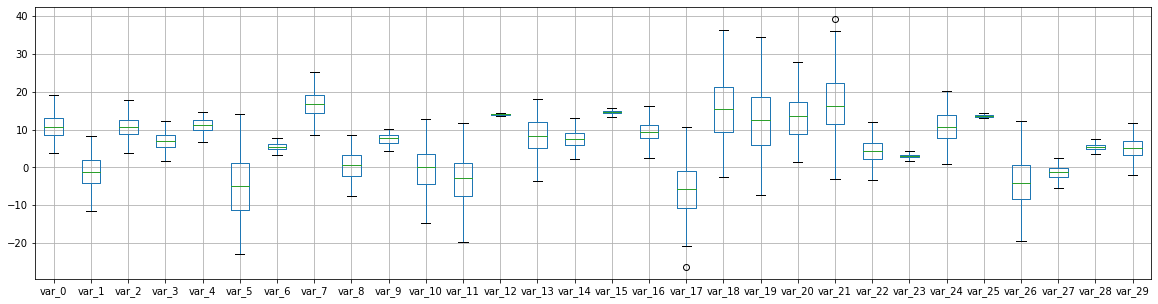

In [13]:
raw_data[num_cols[0:30]].boxplot(figsize = (20, 5))

#### Removing outliers using box plot method

In [14]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # Inter Quartile Range
    
    filter = (df[column] >= (Q1 - 1.5 * IQR)) & ((df[column] <= (Q3 + 1.5 * IQR)))
    noOfOutliers = df.shape[0] - df.loc[filter].shape[0]
    return noOfOutliers, df.loc[filter]

In [15]:
data1 = raw_data.copy()
for col in num_cols:
    NoOfOutliers, data1 = removeOutliers(data1, col)
    print('Column: ', col.upper(), ' --> Number of Outliers:', NoOfOutliers)
    print('-----------------------------------------------------------------')
print('Total Number of Outliers: ', raw_data.shape[0]-data1.shape[0])
print('Final Data Shape: ', data1.shape)
data1.reset_index(inplace=True, drop=True)

Column:  VAR_0  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_1  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_2  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_3  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_4  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_5  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_6  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_7  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_8  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_9  --> Number o

Column:  VAR_80  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_81  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_82  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_83  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_84  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_85  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_86  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_87  --> Number of Outliers: 1
-----------------------------------------------------------------
Column:  VAR_88  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_89  --

Column:  VAR_156  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_157  --> Number of Outliers: 1
-----------------------------------------------------------------
Column:  VAR_158  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_159  --> Number of Outliers: 1
-----------------------------------------------------------------
Column:  VAR_160  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_161  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_162  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_163  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  VAR_164  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  V

#### Removing outliers using zscore

In [16]:
from scipy import stats
z_scores = stats.zscore(raw_data[num_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data2 = raw_data[filtered_entries]
data2.reset_index(drop=True, inplace=True)
print('Total Number of Outliers: ', raw_data.shape[0]-data2.shape[0])
print('Final Data Shape: ', data2.shape)

Total Number of Outliers:  29
Final Data Shape:  (577, 202)


In [17]:
data = data1.copy()

# Feature Scaling

Since all the values are in the similar range, we don't do the feature scaling.

# Model Development

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = data[num_cols]
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(422, 200) (106, 200) (422,) (106,)


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
Logistic_reg = LogisticRegression()
Logistic_reg.fit(X_train, Y_train)
print('Training Accuracy: ', Logistic_reg.score(X_train, Y_train))
print('Testing Accuracy: ', Logistic_reg.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.6792452830188679


C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# NB_clf = MultinomialNB()
# NB_clf.fit(X_train, Y_train)
# print('Training Accuracy: ', NB_clf.score(X_train, Y_train))
# print('Testing Accuracy: ', NB_clf.score(X_test, Y_test))

In [22]:
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', GNB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', GNB_clf.score(X_test, Y_test))

Training Accuracy:  0.9170616113744076
Testing Accuracy:  0.7264150943396226


In [23]:
BNB_clf = BernoulliNB()
BNB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', BNB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', BNB_clf.score(X_test, Y_test))

Training Accuracy:  0.7464454976303317
Testing Accuracy:  0.5


## K-Neighbours Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

KN_clf = KNeighborsClassifier()
KN_clf.fit(X_train, Y_train)
print('Training Accuracy: ', KN_clf.score(X_train, Y_train))
print('Testing Accuracy: ', KN_clf.score(X_test, Y_test))

Training Accuracy:  0.6777251184834123
Testing Accuracy:  0.6132075471698113


## SVM

In [25]:
from sklearn import svm

SVM_clf = svm.SVC()
SVM_clf.fit(X_train, Y_train)
print('Training Accuracy: ', SVM_clf.score(X_train, Y_train))
print('Testing Accuracy: ', SVM_clf.score(X_test, Y_test))

Training Accuracy:  0.8483412322274881
Testing Accuracy:  0.6981132075471698


## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, Y_train)
print('Training Accuracy: ', DT_clf.score(X_train, Y_train))
print('Testing Accuracy: ', DT_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.5188679245283019


## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, Y_train)
print('Training Accuracy: ', RF_clf.score(X_train, Y_train))
print('Testing Accuracy: ', RF_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.6698113207547169


In [28]:
ET_clf = ExtraTreesClassifier()
ET_clf.fit(X_train, Y_train)
print('Training Accuracy: ', ET_clf.score(X_train, Y_train))
print('Testing Accuracy: ', ET_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.6320754716981132


In [29]:
AB_clf = AdaBoostClassifier()
AB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', AB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', AB_clf.score(X_test, Y_test))

Training Accuracy:  0.9786729857819905
Testing Accuracy:  0.5754716981132075


In [30]:
GB_clf = GradientBoostingClassifier()
GB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', GB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', GB_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.6226415094339622


# DONE